<a href="https://www.kaggle.com/code/inzeyun/notebook9846d2c254?scriptVersionId=146815280" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#### Parkinson's Disease Dataset
* Parkinson's Disease (PD)
    * Cell death in substantia niagra -> not enough dopamine -> tremor, rigidity, slow movement
    * Endpoints -> DRS, on / off-time

#### 1. Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer as YJ
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [2]:
data=pd.read_csv("/kaggle/input/unlocking-clues-to-parkinson-s-disease-progressi/parkinsons_updrs.data.csv")

#### 2. Take a Look

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5875 non-null   int64  
 1   subject#       5875 non-null   int64  
 2   age            5875 non-null   int64  
 3   sex            5875 non-null   int64  
 4   test_time      5875 non-null   float64
 5   motor_UPDRS    5875 non-null   float64
 6   total_UPDRS    5875 non-null   float64
 7   Jitter(%)      5875 non-null   float64
 8   Jitter(Abs)    5875 non-null   float64
 9   Jitter:RAP     5875 non-null   float64
 10  Jitter:PPQ5    5875 non-null   float64
 11  Jitter:DDP     5875 non-null   float64
 12  Shimmer        5875 non-null   float64
 13  Shimmer(dB)    5875 non-null   float64
 14  Shimmer:APQ3   5875 non-null   float64
 15  Shimmer:APQ5   5875 non-null   float64
 16  Shimmer:APQ11  5875 non-null   float64
 17  Shimmer:DDA    5875 non-null   float64
 18  NHR     

In [4]:
data.tail(10)

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5865,5865,42,61,0,106.76,25.029,36.029,0.00329,0.000024,0.00144,...,0.180,0.01020,0.01287,0.01776,0.03059,0.010377,24.873,0.51983,0.56668,0.113820
5866,5866,42,61,0,115.65,24.401,35.401,0.00448,0.000036,0.00208,...,0.213,0.01121,0.01475,0.01971,0.03362,0.035738,21.252,0.62957,0.57942,0.245670
5867,5867,42,61,0,121.63,23.979,34.979,0.00250,0.000019,0.00116,...,0.193,0.01104,0.01316,0.01987,0.03313,0.012234,20.661,0.47256,0.57177,0.139550
5868,5868,42,61,0,128.67,23.482,34.482,0.00249,0.000021,0.00066,...,0.142,0.00469,0.00773,0.01997,0.01406,0.007452,25.258,0.52976,0.54378,0.088268
5869,5869,42,61,0,136.80,22.908,33.908,0.00274,0.000021,0.00118,...,0.218,0.01375,0.01595,0.02108,0.04126,0.006058,23.935,0.45357,0.56142,0.134460
5870,5870,42,61,0,142.79,22.485,33.485,0.00406,0.000031,0.00167,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.213670
5871,5871,42,61,0,149.84,21.988,32.988,0.00297,0.000025,0.00119,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.126210
5872,5872,42,61,0,156.82,21.495,32.495,0.00349,0.000025,0.00152,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.141570
5873,5873,42,61,0,163.73,21.007,32.007,0.00281,0.000020,0.00128,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.142040
5874,5874,42,61,0,170.73,20.513,31.513,0.00282,0.000021,0.00135,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.153360


In [5]:
data=data.loc[:,["index","subject#","age","sex","test_time","motor_UPDRS","total_UPDRS","Jitter(%)","Shimmer","NHR","HNR","RPDE","DFA","PPE"]]

array([[<Axes: title={'center': 'motor_UPDRS'}>,
        <Axes: title={'center': 'total_UPDRS'}>,
        <Axes: title={'center': 'Jitter(%)'}>],
       [<Axes: title={'center': 'Shimmer'}>,
        <Axes: title={'center': 'NHR'}>, <Axes: title={'center': 'HNR'}>],
       [<Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>, <Axes: title={'center': 'PPE'}>]],
      dtype=object)

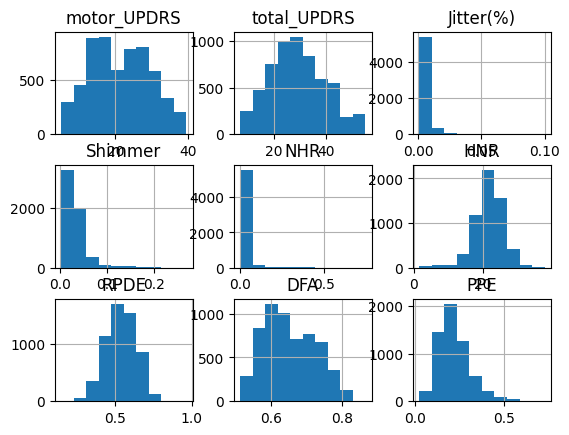

In [6]:
data.hist(column=["motor_UPDRS","total_UPDRS","Jitter(%)","Shimmer","NHR","HNR","RPDE","DFA","PPE"])

#### 3. Get Indices
* Key for time-series

In [7]:
time_delta=data.groupby(["subject#"])["test_time"].diff()
time_delta.agg(["mean","median","std","min"])

mean        1.175751
median      7.000000
std        34.036837
min      -203.994200
Name: test_time, dtype: float64

In [8]:
x=data.assign(time_delta=time_delta)
x[["index","test_time","time_delta"]].query("time_delta<0")

,index,test_time,time_delta
24,24,5.6431,-169.0169
49,49,5.6438,-169.0162
74,74,5.6451,-169.0149
99,99,5.6458,-169.0142
124,124,5.6458,-169.0142
...,...,...,...
5750,5750,-4.2625,-174.9925
5775,5775,-4.2618,-174.9918
5800,5800,-4.2604,-174.9904
5825,5825,-4.2597,-174.9897


In [9]:
data[["subject#","test_time"]].duplicated().sum()

3374

In [10]:
data=data.groupby(["subject#","test_time"]).mean().drop("index",axis=1).reset_index()
data[data["subject#"]==1]

,subject#,test_time,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Shimmer,NHR,HNR,RPDE,DFA,PPE
0,1,5.6431,72.0,0.0,28.1990,34.398,0.005050,0.018785,0.011764,24.783500,0.396140,0.536705,0.165360
1,1,5.6438,72.0,0.0,28.1990,34.398,0.004130,0.012820,0.030790,26.641000,0.509110,0.536370,0.251830
2,1,5.6451,72.0,0.0,28.1990,34.398,0.002170,0.007980,0.004547,30.749000,0.412160,0.545720,0.094704
3,1,5.6458,72.0,0.0,28.1990,34.399,0.002720,0.008445,0.009371,29.816000,0.360195,0.531695,0.116143
4,1,12.6660,72.0,0.0,28.4470,34.894,0.003000,0.020240,0.011112,27.183000,0.434930,0.564770,0.108100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1,152.6400,72.0,0.0,35.5095,46.013,0.004667,0.024310,0.020474,23.698000,0.526880,0.574110,0.226020
61,1,152.6500,72.0,0.0,35.5100,46.013,0.004200,0.021745,0.018926,24.362500,0.445270,0.536960,0.237310
62,1,159.6400,72.0,0.0,35.9760,46.635,0.003637,0.021088,0.015807,25.625833,0.450725,0.562682,0.171085
63,1,166.6400,72.0,0.0,36.4430,47.257,0.003486,0.018290,0.014301,25.986000,0.479962,0.554426,0.194264


In [11]:
mms=MinMaxScaler()
test_time_normal=data.groupby("subject#")["test_time"].apply(
    lambda q:mms.fit_transform(q.to_numpy().reshape(-1,1)))
test_time_normal=test_time_normal.explode().apply(lambda q:q[0])
data["test_time_normal"]=test_time_normal.tolist()
data=data.set_index(["subject#","test_time_normal"])
data.loc[1]

,test_time,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Shimmer,NHR,HNR,RPDE,DFA,PPE
test_time_normal,,,,,,,,,,,,
0.000000,5.6431,72.0,0.0,28.1990,34.398,0.005050,0.018785,0.011764,24.783500,0.396140,0.536705,0.165360
0.000004,5.6438,72.0,0.0,28.1990,34.398,0.004130,0.012820,0.030790,26.641000,0.509110,0.536370,0.251830
0.000012,5.6451,72.0,0.0,28.1990,34.398,0.002170,0.007980,0.004547,30.749000,0.412160,0.545720,0.094704
0.000016,5.6458,72.0,0.0,28.1990,34.399,0.002720,0.008445,0.009371,29.816000,0.360195,0.531695,0.116143
0.041551,12.6660,72.0,0.0,28.4470,34.894,0.003000,0.020240,0.011112,27.183000,0.434930,0.564770,0.108100
...,...,...,...,...,...,...,...,...,...,...,...,...
0.869717,152.6400,72.0,0.0,35.5095,46.013,0.004667,0.024310,0.020474,23.698000,0.526880,0.574110,0.226020
0.869776,152.6500,72.0,0.0,35.5100,46.013,0.004200,0.021745,0.018926,24.362500,0.445270,0.536960,0.237310
0.911133,159.6400,72.0,0.0,35.9760,46.635,0.003637,0.021088,0.015807,25.625833,0.450725,0.562682,0.171085


#### 4. Determinants
* Preprocessing

In [12]:
sex=data.reset_index()[["subject#","sex"]].drop_duplicates()
pe=data.drop(["sex","test_time"],axis=1)
pe["motor_UPDRS"]=pe.groupby(["subject#"])["motor_UPDRS"].diff()
pe["total_UPDRS"]=pe.groupby(["subject#"])["total_UPDRS"].diff()
pe

age  motor_UPDRS  total_UPDRS  Jitter(%)  \
subject# test_time_normal                                              
1        0.000000          72.0          NaN          NaN   0.005050   
         0.000004          72.0     0.000000     0.000000   0.004130   
         0.000012          72.0     0.000000     0.000000   0.002170   
         0.000016          72.0     0.000000     0.001000   0.002720   
         0.041551          72.0     0.248000     0.495000   0.003000   
...                         ...          ...          ...        ...   
42       0.880623          61.0     0.000000     0.000000   0.002650   
         0.920454          61.0    -0.492667    -0.492667   0.005090   
         0.920511          61.0    -0.000333    -0.000333   0.003810   
         0.959998          61.0    -0.488000    -0.488000   0.004748   
         1.000000          61.0    -0.494000    -0.494000   0.004995   

                            Shimmer       NHR        HNR      RPDE       DFA  \
subject# test_time_normal                                                      
1        0.000000          0.018785  0.011764  24.783500  0.396140  0.536705   
         0.000004          0.012820  0.030790  26.641000  0.509110  0.536370   
         0.000012          0.007980  0.004547  30.749000  0.412160  0.545720   
         0.000016          0.008445  0.009371  29.816000  0.360195  0.531695   
         0.041551          0.020240  0.011112  27.183000  0.434930  0.564770   
...                             ...       ...        ...       ...       ...   
42       0.880623          0.019965  0.008467  24.276500  0.493365  0.562485   
         0.920454          0.023887  0.022247  23.399333  0.514943  0.616523   
         0.920511          0.024573  0.015319  24.057000  0.468810  0.601413   
         0.959998          0.025895  0.022209  23.025667  0.493693  0.614125   
         1.000000          0.020587  0.023132  23.409333  0.502330  0.604558   

                                PPE  
subject# test_time_normal            
1        0.000000          0.165360  
         0.000004          0.251830  
         0.000012          0.094704  
         0.000016          0.116143  
         0.041551          0.108100  
...                             ...  
42       0.880623          0.119480  
         0.920454          0.170557  
         0.920511          0.167600  
         0.959998          0.167328  
         1.000000          0.197173  

[2501 rows x 10 columns]

In [13]:
yj=YJ()
pe_=pd.DataFrame(yj.fit_transform(pe),index=pe.index,columns=pe.columns)
pe_

age  motor_UPDRS  total_UPDRS  Jitter(%)  \
subject# test_time_normal                                                  
1        0.000000          0.813500          NaN          NaN  -0.055772   
         0.000004          0.813500    -0.109509    -0.147015  -0.516940   
         0.000012          0.813500    -0.109509    -0.147015  -1.807017   
         0.000016          0.813500    -0.109509    -0.144325  -1.396303   
         0.041551          0.813500     0.654229     1.180285  -1.202837   
...                             ...          ...          ...        ...   
42       0.880623         -0.497713    -0.109509    -0.147015  -1.446268   
         0.920454         -0.497713    -1.623821    -1.476783  -0.037455   
         0.920511         -0.497713    -0.110535    -0.147912  -0.696765   
         0.959998         -0.497713    -1.609493    -1.464151  -0.198383   
         1.000000         -0.497713    -1.627915    -1.480392  -0.081180   

                            Shimmer       NHR       HNR      RPDE       DFA  \
subject# test_time_normal                                                     
1        0.000000         -0.892298 -0.811000  0.792278 -1.558432 -1.912754   
         0.000004         -1.574967  0.569170  1.358862 -0.360606 -1.919483   
         0.000012         -2.234735 -1.574749  2.732539 -1.388266 -1.733981   
         0.000016         -2.166736 -1.046303  2.406081 -1.940622 -2.014055   
         0.041551         -0.744819 -0.873445  1.530623 -1.146578 -1.370502   
...                             ...       ...       ...       ...       ...   
42       0.880623         -0.772165 -1.139528  0.643592 -0.527256 -1.413105   
         0.920454         -0.404190  0.043638  0.392420 -0.298887 -0.472712   
         0.920511         -0.344399 -0.491009  0.580016 -0.787342 -0.722102   
         0.959998         -0.232960  0.040993  0.287767 -0.523780 -0.511633   
         1.000000         -0.710690  0.104386  0.395240 -0.432356 -0.669366   

                                PPE  
subject# test_time_normal            
1        0.000000         -0.633165  
         0.000004          0.530532  
         0.000012         -1.913597  
         0.000016         -1.486644  
         0.041551         -1.642529  
...                             ...  
42       0.880623         -1.423434  
         0.920454         -0.552164  
         0.920511         -0.598053  
         0.959998         -0.602306  
         1.000000         -0.161304  

[2501 rows x 10 columns]

array([[<Axes: title={'center': 'motor_UPDRS'}>,
        <Axes: title={'center': 'total_UPDRS'}>,
        <Axes: title={'center': 'Jitter(%)'}>],
       [<Axes: title={'center': 'Shimmer'}>,
        <Axes: title={'center': 'NHR'}>, <Axes: title={'center': 'HNR'}>],
       [<Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>, <Axes: title={'center': 'PPE'}>]],
      dtype=object)

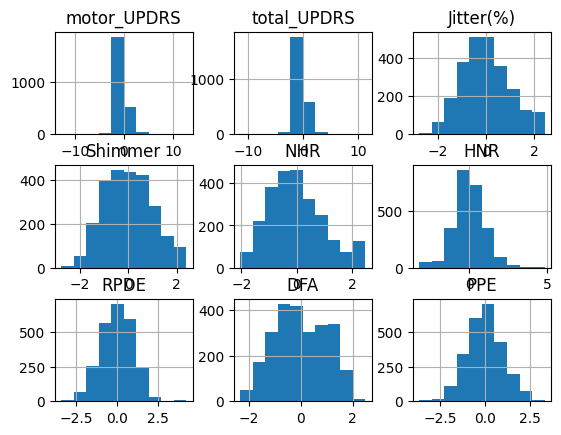

In [14]:
pe_.hist(column=["motor_UPDRS","total_UPDRS","Jitter(%)","Shimmer","NHR","HNR","RPDE","DFA","PPE"])

In [15]:
pe.agg(["mean","median","std"]).T.join(pe_.agg(["mean","median","std"]).T,rsuffix="_YJ")

,mean,median,std,mean_YJ,median_YJ,std_YJ
age,64.854058,65.000000,8.759081,5.568428e-16,-0.042552,1.000200
motor_UPDRS,0.035349,0.000000,0.324949,2.889560e-17,-0.109509,1.000203
total_UPDRS,0.055462,0.000000,0.372068,-2.311648e-17,-0.147015,1.000203
Jitter(%),0.006177,0.005038,0.005181,1.931903e-16,-0.061140,1.000200
Shimmer,0.033967,0.028470,0.023472,-5.682069e-17,-0.028945,1.000200
NHR,0.032144,0.020110,0.053086,7.954897e-17,-0.109799,1.000200
HNR,21.664103,21.804500,3.995894,-1.250055e-16,-0.044433,1.000200
RPDE,0.543364,0.548030,0.094629,-3.977448e-16,0.050942,1.000200
DFA,0.652896,0.640647,0.068753,-3.977448e-16,-0.094580,1.000200
PPE,0.220346,0.210140,0.083013,-2.045545e-16,0.015509,1.000200


subject#
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
dtype: object

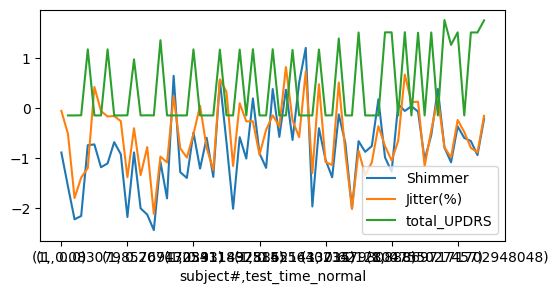

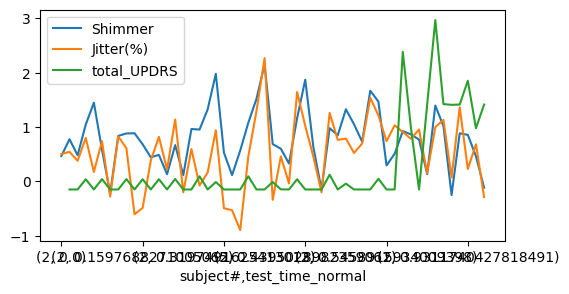

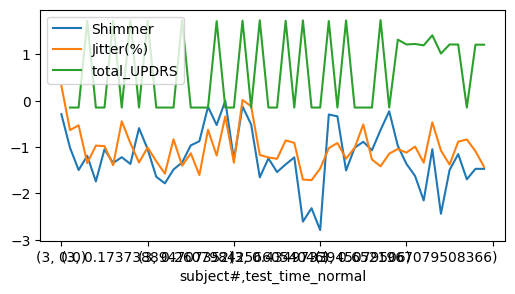

In [16]:
pe_.loc[:3].groupby("subject#")[["Shimmer","Jitter(%)","total_UPDRS"]].plot(figsize=(6,3))

In [17]:
xy=pe_.dropna(how="any").reset_index().set_index("subject#")

In [18]:
xy=xy.apply(pd.to_numeric,downcast="float")

In [19]:
_x=pd.concat([
    xy.loc[:,:"age"],
    xy.loc[:,"Jitter(%)":]],axis=1
    ).merge(sex,how="left",left_on="subject#",right_on="subject#"
    ).drop("subject#",axis=1)
y=xy.loc[:,"total_UPDRS"]
_x

,test_time_normal,age,Jitter(%),Shimmer,NHR,HNR,RPDE,DFA,PPE,sex
0,0.000004,0.813500,-0.516940,-1.574967,0.569170,1.358862,-0.360606,-1.919483,0.530532,0.0
1,0.000012,0.813500,-1.807017,-2.234735,-1.574749,2.732539,-1.388266,-1.733981,-1.913597,0.0
2,0.000016,0.813500,-1.396304,-2.166736,-1.046303,2.406081,-1.940622,-2.014055,-1.486644,0.0
3,0.041551,0.813500,-1.202837,-0.744819,-0.873445,1.530623,-1.146579,-1.370502,-1.642529,0.0
4,0.041557,0.813500,0.425681,-0.729512,0.549630,0.929698,-0.826075,-1.791497,-0.394426,0.0
...,...,...,...,...,...,...,...,...,...,...
2454,0.880623,-0.497713,-1.446268,-0.772165,-1.139528,0.643592,-0.527256,-1.413105,-1.423434,0.0
2455,0.920454,-0.497713,-0.037455,-0.404190,0.043638,0.392420,-0.298887,-0.472712,-0.552164,0.0
2456,0.920511,-0.497713,-0.696765,-0.344399,-0.491009,0.580016,-0.787342,-0.722102,-0.598053,0.0
2457,0.959998,-0.497713,-0.198383,-0.232960,0.040993,0.287767,-0.523780,-0.511633,-0.602306,0.0


#### 5. Estimation

In [20]:
poly=PolynomialFeatures(5)
x=poly.fit_transform(_x)

In [21]:
estimator=Ridge(3)
estimator.fit(x,y)

Ridge(alpha=3)

In [22]:
y_pred=estimator.predict(x)
result=pd.DataFrame({"vsdt":xy.test_time_normal,"org":y,"pred":y_pred,}).reset_index()
result

,subject#,vsdt,org,pred
0,1,0.000004,-0.147015,-0.260797
1,1,0.000012,-0.147015,-0.345726
2,1,0.000016,-0.144325,-0.062451
3,1,0.041551,1.180285,0.793107
4,1,0.041557,-0.147015,0.008921
...,...,...,...,...
2454,42,0.880623,-0.147015,-0.484293
2455,42,0.920454,-1.476783,-1.077723
2456,42,0.920511,-0.147912,-0.889475
2457,42,0.959998,-1.464151,-1.445341


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


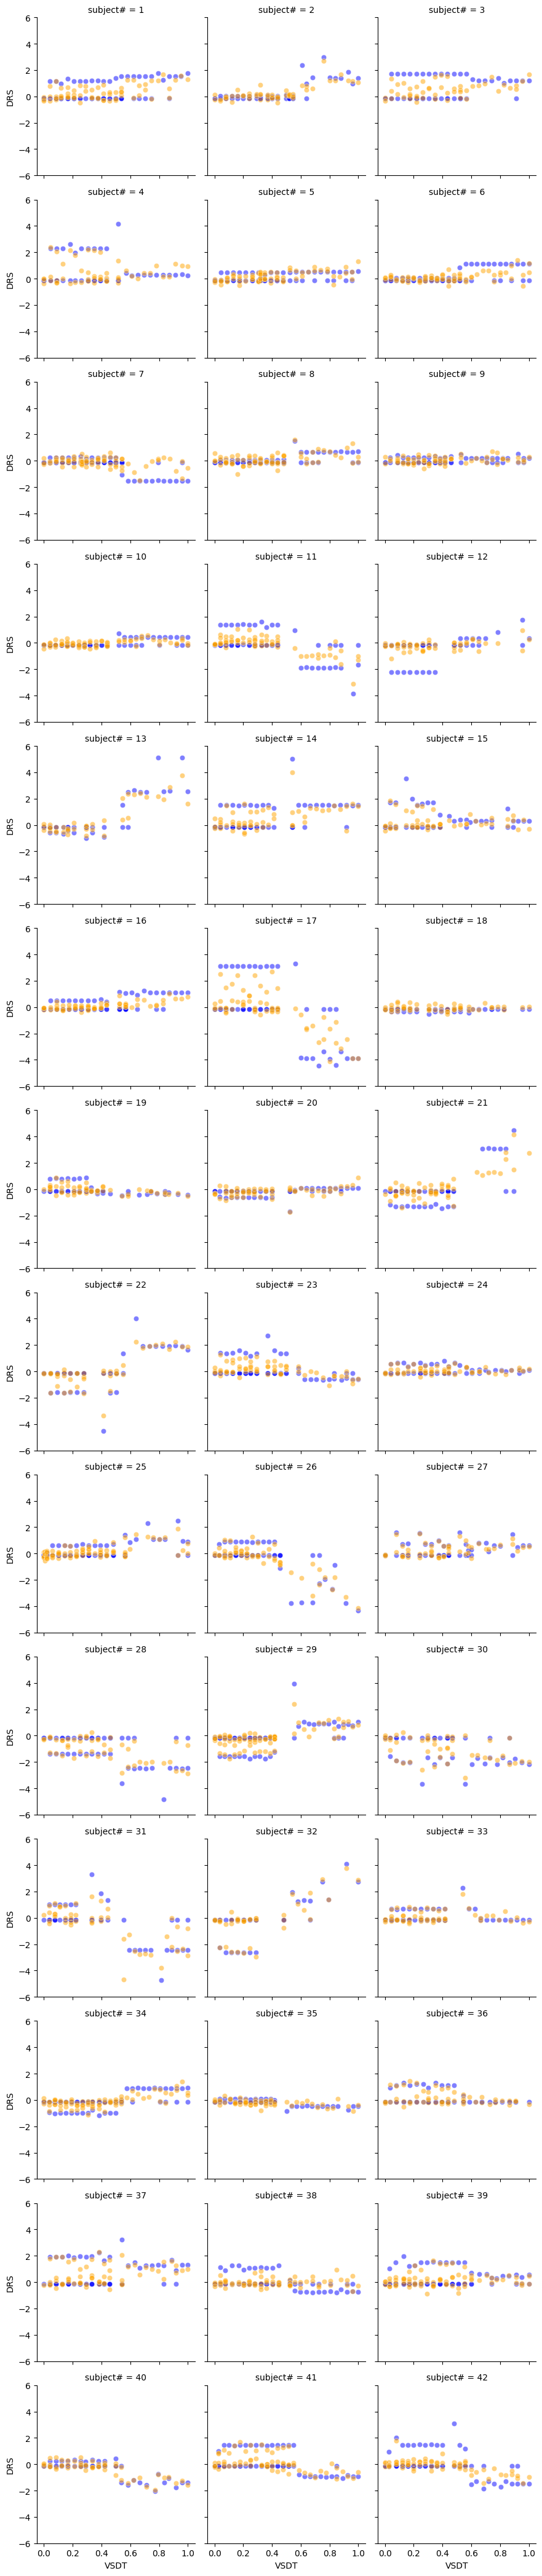

In [23]:
g=sns.FacetGrid(result,col="subject#",col_wrap=3)
g.map_dataframe(sns.scatterplot,x="vsdt",y="org",color="blue",alpha=.5,)
g.map_dataframe(sns.scatterplot,x="vsdt",y="pred",color="orange",alpha=.5,)
g.set(ylim=(-6,6))
g.set_axis_labels("VSDT","DRS")
# fg,ax=plt.subplots(42,1,figsize=(5,150))
# for q in result["subject#"].unique():
#     _view=result[result["subject#"]==q]
#     ax[q-1].set_title(f"subject# {q}")
#     ax[q-1].scatter(_view.vsdt,_view.org,label="org",alpha=.5)
#     ax[q-1].scatter(_view.vsdt,_view.pred,label="pred",alpha=.5)
#     ax[q-1].set_ylim(-5.5,5.5)